In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt


import pandas as pd

class GenerateurDeDonnees():
    def __init__(self):
        pass

    # Moyenne Artithmetique Simple (SMA)
    def moyenne_mobile_simple(self, donnees, fenetre):
        return donnees.rolling(window=fenetre).mean()

    # Moyenne Mobile Exponentielle (EWMA)
    def EMA(self, donnees, fenetre):
        return donnees.ewm(span=fenetre).mean()

    # MACD (Moving Average Convergence Divergence)
    def MACD(self, donnees, long, court, fenetre_signal):
        moyenne_courte = donnees.ewm(span=court).mean()
        moyenne_longue = donnees.ewm(span=long).mean()
        macd = moyenne_courte - moyenne_longue
        signal = macd.ewm(span=fenetre_signal).mean()
        return signal

    # RSI (Relative Strength Index)
    def RSI(self, donnees, fenetre):
        delta = donnees.diff(1)
        hausse = delta.copy()
        baisse = delta.copy()
        hausse[hausse < 0] = 0
        baisse[baisse > 0] = 0
        moyenne_hausse = hausse.rolling(window=fenetre).mean()
        moyenne_baisse = baisse.abs().rolling(window=fenetre).mean()
        rs = moyenne_hausse / moyenne_baisse
        rsi = 100.0 - (100.0 / (1.0 + rs))
        return rsi

    # ATR (Average True Range)
    def atr(self, haut, bas, fenetre):
        plage = haut - bas
        return plage.rolling(window=fenetre).mean()

    # Bandes de Bollinger
    def bandes_bollinger(self, donnees, fenetre):
        moyenne = donnees.rolling(window=fenetre).mean()
        ecart_type = donnees.rolling(window=fenetre).std()
        superieure = moyenne + 2 * ecart_type
        inferieure = moyenne - 2 * ecart_type
        return superieure, inferieure

    # RSV (Raw Stochastic Value)
    def rsv(self, donnees, fenetre):
        minimum = donnees.rolling(window=fenetre).min()
        maximum = donnees.rolling(window=fenetre).max()
        rsv = (donnees - minimum) / (maximum - minimum) * 100
        return rsv

In [2]:

# Définir la période de téléchargement
debut = dt.datetime(2000, 1, 1)
fin = dt.datetime(2025, 6, 30)

# Télécharger les données de Yahoo Finance via yfinance
donnees = yf.download('BNP.PA', start=debut, end=fin, auto_adjust=True)
display(donnees)
# Supprimer la hiérarchie du header et ne garder que les noms de colonnes (ex: 'Close', 'Open', etc.)
donnees.columns = donnees.columns.get_level_values(0)

# Si 'Date' est l'index ou une colonne, assure-toi qu'elle est bien formatée
if 'Date' in donnees.columns:
    donnees['Date'] = pd.to_datetime(df['Date'])
    donnees.set_index('Date', inplace=True)


# Calculs de base sur les variations de prix

# Variation en pourcentage entre la clôture du jour et celle de la veille
donnees['variation_pourcent'] = (donnees['Close'] - donnees['Close'].shift(1)) / donnees['Close'].shift(1)

# Variation logarithmique (utilisée en finance pour sa stabilité statistique)
donnees['variation_log'] = np.log(donnees['Close'] / donnees['Close'].shift(1))

#  Génération des indicateurs techniques
Generateur = GenerateurDeDonnees()

# Moyennes mobiles exponentielles (EMA)
donnees['moyenne_mobile_7'] = Generateur.EMA(donnees['Close'], 7)
donnees['moyenne_mobile_14'] = Generateur.EMA(donnees['Close'], 14)
donnees['moyenne_mobile_21'] = Generateur.EMA(donnees['Close'], 21)

# MACD (indicateur de tendance et retournement)
donnees['macd_7'] = Generateur.MACD(donnees['Close'], 3, 11, 7)
donnees['macd_14'] = Generateur.MACD(donnees['Close'], 7, 21, 14)

# RSI (Relative Strength Index - force relative)
donnees['rsi_7'] = Generateur.RSI(donnees['Close'], 7)
donnees['rsi_14'] = Generateur.RSI(donnees['Close'], 14)
donnees['rsi_21'] = Generateur.RSI(donnees['Close'], 21)

# ATR (Average True Range - volatilité)
donnees['atr_7'] = Generateur.atr(donnees['High'], donnees['Low'], 7)
donnees['atr_14'] = Generateur.atr(donnees['High'], donnees['Low'], 14)
donnees['atr_21'] = Generateur.atr(donnees['High'], donnees['Low'], 21)

# Bandes de Bollinger
donnees['bande_sup_7'], donnees['bande_inf_7'] = Generateur.bandes_bollinger(donnees['Close'], 7)
donnees['bande_sup_14'], donnees['bande_inf_14'] = Generateur.bandes_bollinger(donnees['Close'], 14)
donnees['bande_sup_21'], donnees['bande_inf_21'] = Generateur.bandes_bollinger(donnees['Close'], 21)

#  RSV (valeur stochastique brute)
donnees['rsv_7'] = Generateur.rsv(donnees['Close'], 7)
donnees['rsv_14'] = Generateur.rsv(donnees['Close'], 14)
donnees['rsv_21'] = Generateur.rsv(donnees['Close'], 21)

# Données Supplémentaires
tickers = ['^FCHI','^SPX', '^VIX', 'BNP.PA', 'CA.PA', 'CS.PA', 'ENGI.PA', 'MC.PA', 'OR.PA', 'SAN.PA', 'SGO.PA']
donneesSupp = yf.download(tickers, start=debut, end=fin)['Close']
donneesSupp.to_csv('NewDataSet.csv')

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BNP.PA,BNP.PA,BNP.PA,BNP.PA,BNP.PA
Date,,,,,
2000-01-03,13.915885,14.171636,13.840664,13.840664,3712665
2000-01-04,13.524739,13.765446,13.449518,13.750402,6404755
2000-01-05,13.238900,13.524740,13.088458,13.389341,4837347
2000-01-06,12.787577,13.268991,12.787577,13.238903,6594478
2000-01-07,12.953058,13.073411,12.817661,12.862794,5929662
...,...,...,...,...,...
2025-06-23,73.080002,74.239998,72.589996,74.000000,2307376
2025-06-24,75.379997,75.809998,74.610001,74.739998,2810546


C:\Users\lamaa\AppData\Local\Temp\ipykernel_33104\2234305201.py:59: FutureWarning: YF.download() has changed argument auto_adjust default to True
  donneesSupp = yf.download(tickers, start=debut, end=fin)['Close']
[*********************100%***********************]  11 of 11 completed


In [3]:
# Chargement du fichier CSV contenant d'autres données
autres_donnees = pd.read_csv('NewDataSet.csv', index_col='Date', parse_dates=True)

# Affichage des 5 premières lignes pour vérification
autres_donnees.head()

# Fusion des deux ensembles de données en utilisant l'index (les dates)
donnees_combinees = donnees.merge(autres_donnees, how='left', left_index=True, right_index=True)

# Affichage des premières lignes du résultat fusionné
donnees_combinees.head()

# Suppression des lignes contenant des valeurs manquantes (NaN)
donnees_combinees = donnees_combinees.dropna()

# Affichage des premières lignes après nettoyage
donnees_combinees.head()


,Close,High,Low,Open,Volume,variation_pourcent,variation_log,moyenne_mobile_7,moyenne_mobile_14,moyenne_mobile_21,...,CA.PA,CS.PA,ENGI.PA,MC.PA,OR.PA,SAN.PA,SGO.PA,^FCHI,^SPX,^VIX
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,12.291112,12.441554,12.200847,12.306155,4326865,0.004920,0.004908,12.274446,12.358093,12.424311,...,39.197365,5.494503,8.879187,51.254463,45.599171,16.272537,17.252300,5773.419922,1409.280029,23.450001
2000-02-02,12.095541,12.396425,12.050408,12.336248,4854258,-0.015912,-0.016040,12.229659,12.321734,12.390665,...,40.054798,5.494503,9.838304,53.499172,46.470928,16.691927,17.381226,5946.859863,1409.119995,23.120001
2000-02-03,12.065453,12.185806,11.930054,12.035363,7505942,-0.002488,-0.002491,12.188567,12.286424,12.357760,...,40.324280,5.744251,10.297268,54.983162,46.672100,16.566109,17.908634,6149.669922,1424.969971,22.010000
2000-02-04,12.020320,12.110585,11.945099,12.035363,5197741,-0.003741,-0.003748,12.146473,12.249924,12.323964,...,40.544762,5.744251,10.179584,54.995640,47.879128,16.356411,17.791431,6275.720215,1424.369995,21.540001
2000-02-07,11.689342,12.035358,11.629165,12.035358,7470131,-0.027535,-0.027921,12.032126,12.173324,12.260987,...,40.177288,5.661002,10.167817,54.559155,47.677967,16.356411,17.557032,6203.580078,1424.239990,22.790001


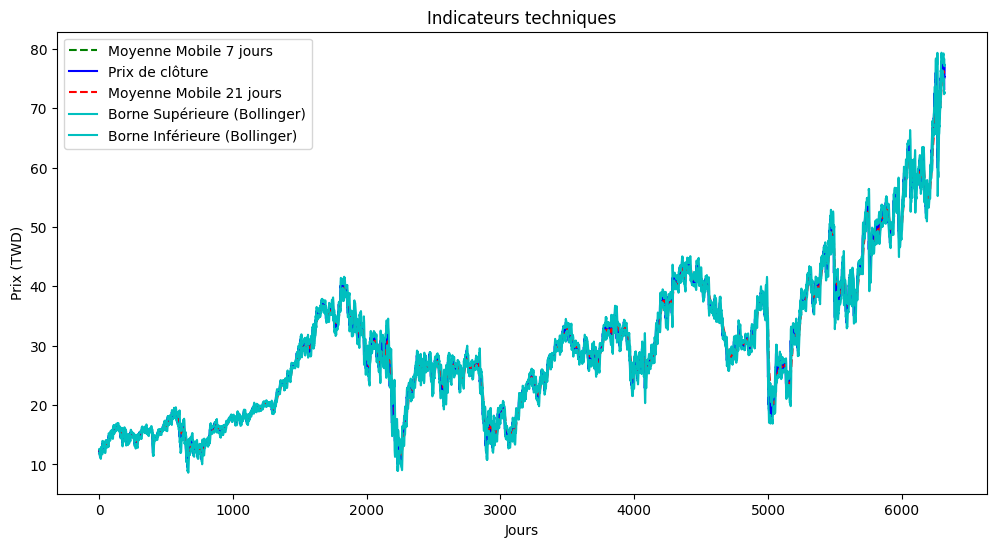

In [4]:
# Création d'un vecteur représentant les jours (pour l'axe des x)
x_ = np.arange(donnees_combinees.shape[0])

# Création de la figure
plt.figure(figsize=(12, 6))

# Moyenne mobile sur 7 jours
plt.plot(donnees_combinees['moyenne_mobile_7'].values, label='Moyenne Mobile 7 jours', color='g', linestyle='--')

# Prix de clôture
plt.plot(donnees_combinees['Close'].values, label='Prix de clôture', color='b')

# Moyenne mobile sur 21 jours
plt.plot(donnees_combinees['moyenne_mobile_21'].values, label='Moyenne Mobile 21 jours', color='r', linestyle='--')

# Bandes de Bollinger supérieures et inférieures
plt.plot(donnees_combinees['bande_sup_7'].values, label='Borne Supérieure (Bollinger)', color='c')
plt.plot(donnees_combinees['bande_inf_7'].values, label='Borne Inférieure (Bollinger)', color='c')

# Remplissage entre les bandes de Bollinger
plt.fill_between(x_,
                 donnees_combinees['bande_inf_7'].values,
                 donnees_combinees['bande_sup_7'].values,
                 alpha=0.35)

# Titres et axes
plt.title("Indicateurs techniques")
plt.ylabel("Prix (TWD)")
plt.xlabel("Jours")
plt.legend()

# Affichage
plt.show()

c:\Users\lamaa\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\lamaa\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\lamaa\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\lamaa\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\lamaa\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfin

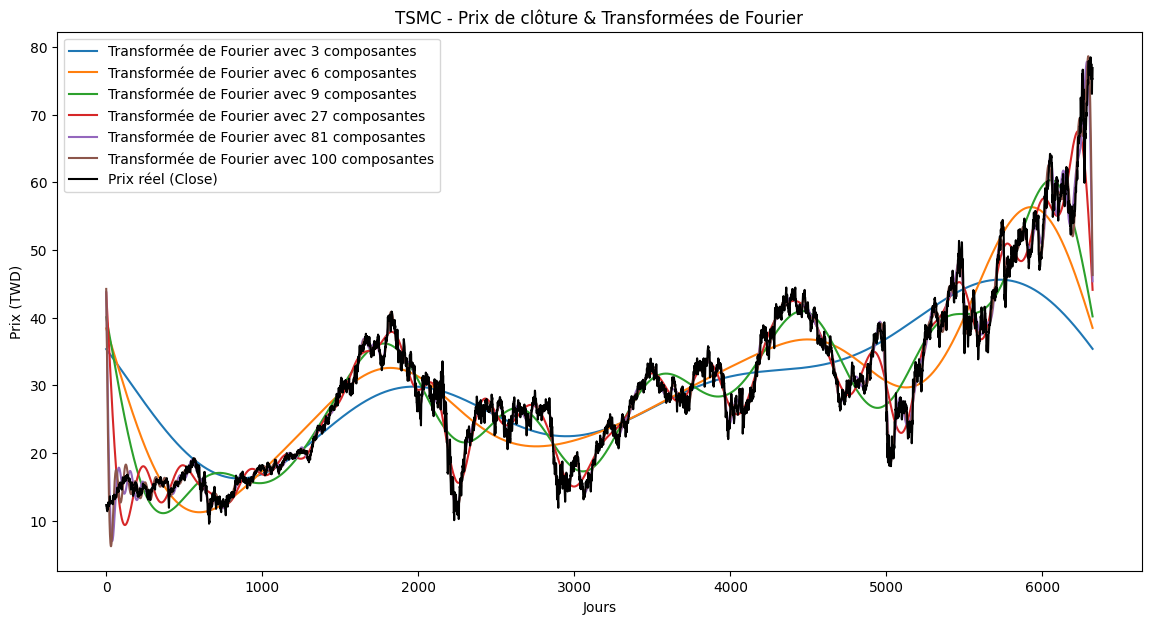

c:\Users\lamaa\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\Users\lamaa\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\Users\lamaa\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\Users\lamaa\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
c:\Users\lamaa\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\dtypes\astype.py:133: ComplexWarning: Ca

,Close,High,Low,Open,Volume,variation_pourcent,variation_log,moyenne_mobile_7,moyenne_mobile_14,moyenne_mobile_21,...,SGO.PA,^FCHI,^SPX,^VIX,TF_3_composantes,TF_6_composantes,TF_9_composantes,TF_27_composantes,TF_81_composantes,TF_100_composantes
Date,,,,,,,,,,,,,,,,,,,,,
2000-02-01,12.291112,12.441554,12.200847,12.306155,4326865,0.004920,0.004908,12.274446,12.358093,12.424311,...,17.252300,5773.419922,1409.280029,23.450001,35.349378,38.401528,40.050499,43.661141,43.793165,44.242161
2000-02-02,12.095541,12.396425,12.050408,12.336248,4854258,-0.015912,-0.016040,12.229659,12.321734,12.390665,...,17.381226,5946.859863,1409.119995,23.120001,35.318356,38.326488,39.921906,43.213284,42.216998,42.185532
2000-02-03,12.065453,12.185806,11.930054,12.035363,7505942,-0.002488,-0.002491,12.188567,12.286424,12.357760,...,17.908634,6149.669922,1424.969971,22.010000,35.287310,38.251411,39.793214,42.764218,40.641049,40.130070
2000-02-04,12.020320,12.110585,11.945099,12.035363,5197741,-0.003741,-0.003748,12.146473,12.249924,12.323964,...,17.791431,6275.720215,1424.369995,21.540001,35.256240,38.176300,39.664426,42.314063,39.068844,38.083212
2000-02-07,11.689342,12.035358,11.629165,12.035358,7470131,-0.027535,-0.027921,12.032126,12.173324,12.260987,...,17.557032,6203.580078,1424.239990,22.790001,35.225147,38.101153,39.535545,41.862942,37.503897,36.052338


In [5]:

# Appliquer la transformée de Fourier discrète (FFT) sur les prix de clôture
fermetures_fft = np.fft.fft(np.asarray(donnees_combinees['Close'].tolist()))

# Créer un DataFrame avec les résultats de la FFT
fft_df = pd.DataFrame({'fft': fermetures_fft})
fft_df['module'] = fft_df['fft'].apply(lambda x: np.abs(x))     # Valeur absolue (amplitude)
fft_df['phase'] = fft_df['fft'].apply(lambda x: np.angle(x))    # Phase (angle)

# Visualisation des reconstructions selon différents niveaux de simplification (n composantes)
plt.figure(figsize=(14, 7), dpi=100)

fft_liste = np.asarray(fft_df['fft'].tolist())

# On garde seulement les N premières composantes de la FFT et on remet les autres à 0
for nb_composantes in [3, 6, 9, 27, 81, 100]:
    fft_reduite = np.copy(fft_liste)
    fft_reduite[nb_composantes:-nb_composantes] = 0  # Filtrage fréquentiel
    donnees_combinees[f'TF_{nb_composantes}_composantes'] = np.fft.ifft(fft_reduite)
    
    # Tracer la courbe reconstruite avec N composantes
    plt.plot(np.fft.ifft(fft_reduite), label=f'Transformée de Fourier avec {nb_composantes} composantes')

# Tracer la courbe réelle des prix de clôture
plt.plot(donnees_combinees['Close'].values, label='Prix réel (Close)', color='black')

# Étiquettes et titre
plt.xlabel('Jours')
plt.ylabel('Prix (TWD)')
plt.title("TSMC - Prix de clôture & Transformées de Fourier")
plt.legend()
plt.show()

# Conversion des colonnes reconstruites (via FFT inverse) en type float
donnees_combinees['TF_3_composantes'] = donnees_combinees['TF_3_composantes'].astype(float)
donnees_combinees['TF_6_composantes'] = donnees_combinees['TF_6_composantes'].astype(float)
donnees_combinees['TF_9_composantes'] = donnees_combinees['TF_9_composantes'].astype(float)
donnees_combinees['TF_27_composantes'] = donnees_combinees['TF_27_composantes'].astype(float)
donnees_combinees['TF_81_composantes'] = donnees_combinees['TF_81_composantes'].astype(float)
donnees_combinees['TF_100_composantes'] = donnees_combinees['TF_100_composantes'].astype(float)

# Affichage des premières lignes du DataFrame mis à jour
donnees_combinees.head()

In [6]:
donnees_combinees.to_csv('AllData.csv')

In [7]:

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

In [8]:
# Chargement du fichier CSV (série temporelle de marché ou données financières)
donnees_originales = pd.read_csv('AllData.csv', index_col = 'Date')

# Ne garder que les 2665 premières lignes
donnees_originales = donnees_originales.iloc[:2665, :]
donnees_originales
display(donnees_originales.shape)
# Définir la variable cible comme la colonne "Close"
donnees_originales['cible'] = donnees_originales['Close']
display(donnees_originales.shape)
# Séparer les données en variables explicatives (X) et cible (y)
X = donnees_originales.iloc[:, :44].values    # 59 premières colonnes comme features
y = donnees_originales.iloc[:, 44].values     # 60e colonne (Close)
display(y)
# Découpage en ensembles d'entraînement et de test (80% / 20%)
separation = int(donnees_originales.shape[0] * 0.8)
X_entrainement, X_test = X[:separation, :], X[separation - 20:, :]
y_entrainement, y_test = y[:separation], y[separation - 20:]

# Affichage des dimensions
print(f"X_entrainement : {X_entrainement.shape} | y_entrainement : {y_entrainement.shape}")
print(f"X_test : {X_test.shape} | y_test : {y_test.shape}")

# Normalisation des données dans l’intervalle [0, 1]
normaliseur_X = MinMaxScaler(feature_range=(0, 1))
normaliseur_y = MinMaxScaler(feature_range=(0, 1))

X_entrainement = normaliseur_X.fit_transform(X_entrainement)
X_test = normaliseur_X.transform(X_test)

y_entrainement = normaliseur_y.fit_transform(y_entrainement.reshape(-1, 1))
y_test = normaliseur_y.transform(y_test.reshape(-1, 1))    

(2665, 44)

(2665, 45)

array([12.29111195, 12.095541  , 12.06545258, ..., 25.89938545,
       25.79537582, 25.75574493])

X_entrainement : (2132, 44) | y_entrainement : (2132,)
X_test : (553, 44) | y_test : (553,)


#Un VAE (Variational Autoencoder) est un type de réseau de neurones génératif. Il fait partie de la famille des autoencodeurs, mais avec une approche probabiliste.
#Objectif :
Générer de nouvelles données réalistes (images, séries temporelles, sons...) qui ressemblent à celles observées — tout en apprenant une représentation compacte et continue de l’information appelée espace latent.

In [9]:

class VAE(nn.Module):
    def __init__(self, configuration, dimension_latente):
        super().__init__()

        # Construction de l'encodeur
        modules = []
        for i in range(1, len(configuration)):
            modules.append(
                nn.Sequential(
                    nn.Linear(configuration[i - 1], configuration[i]),  # Couche linéaire
                    nn.ReLU()  # Activation ReLU
                )
            )

        self.encodeur = nn.Sequential(*modules)

        # Couches pour générer la moyenne (mu) et la variance logarithmique (logVar)
        self.fc_mu = nn.Linear(configuration[-1], dimension_latente)
        self.fc_var = nn.Linear(configuration[-1], dimension_latente)

        # Construction du décodeur
        modules = []
        self.entree_decodeur = nn.Linear(dimension_latente, configuration[-1])

        for i in range(len(configuration) - 1, 1, -1):
            modules.append(
                nn.Sequential(
                    nn.Linear(configuration[i], configuration[i - 1]),
                    nn.ReLU()
                )
            )

        # Dernière couche du décodeur avec Sigmoid pour normaliser la sortie
        modules.append(
            nn.Sequential(
                nn.Linear(configuration[1], configuration[0]),
                nn.Sigmoid()
            )
        )

        self.decodeur = nn.Sequential(*modules)

    def encode(self, x):
        """Encode l'entrée x pour obtenir mu et logVar."""
        resultat = self.encodeur(x)
        mu = self.fc_mu(resultat)
        logVar = self.fc_var(resultat)
        return mu, logVar

    def decode(self, z):
        """Reconstruction à partir de la variable latente z."""
        return self.decodeur(z)

    def reparameterize(self, mu, logVar):
        """
        Applique le "trick de reparamétrisation" :
        z = mu + sigma * epsilon, où epsilon ~ N(0,1)
        """
        std = torch.exp(0.5 * logVar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, x):
        """
        Passe complet : encodage, reparamétrisation, décodage.
        Retourne : reconstruction, z, mu, logVar
        """
        mu, logVar = self.encode(x)
        z = self.reparameterize(mu, logVar)
        sortie = self.decode(z)
        return sortie, z, mu, logVar


[1/300] Perte totale : 610.8637
[2/300] Perte totale : 579.3872
[3/300] Perte totale : 560.1911
[4/300] Perte totale : 550.6238
[5/300] Perte totale : 544.3721
[6/300] Perte totale : 538.9608
[7/300] Perte totale : 533.6488
[8/300] Perte totale : 528.8557
[9/300] Perte totale : 524.6207
[10/300] Perte totale : 520.6110
[11/300] Perte totale : 516.8089
[12/300] Perte totale : 513.1410
[13/300] Perte totale : 509.5570
[14/300] Perte totale : 506.0238
[15/300] Perte totale : 502.5293
[16/300] Perte totale : 499.0727
[17/300] Perte totale : 495.6386
[18/300] Perte totale : 492.2379
[19/300] Perte totale : 488.8720
[20/300] Perte totale : 485.5208
[21/300] Perte totale : 482.1853
[22/300] Perte totale : 478.8849
[23/300] Perte totale : 475.5970
[24/300] Perte totale : 472.3410
[25/300] Perte totale : 469.0923
[26/300] Perte totale : 465.8602
[27/300] Perte totale : 462.6416
[28/300] Perte totale : 459.4509
[29/300] Perte totale : 456.2752
[30/300] Perte totale : 453.1138
[31/300] Perte tota

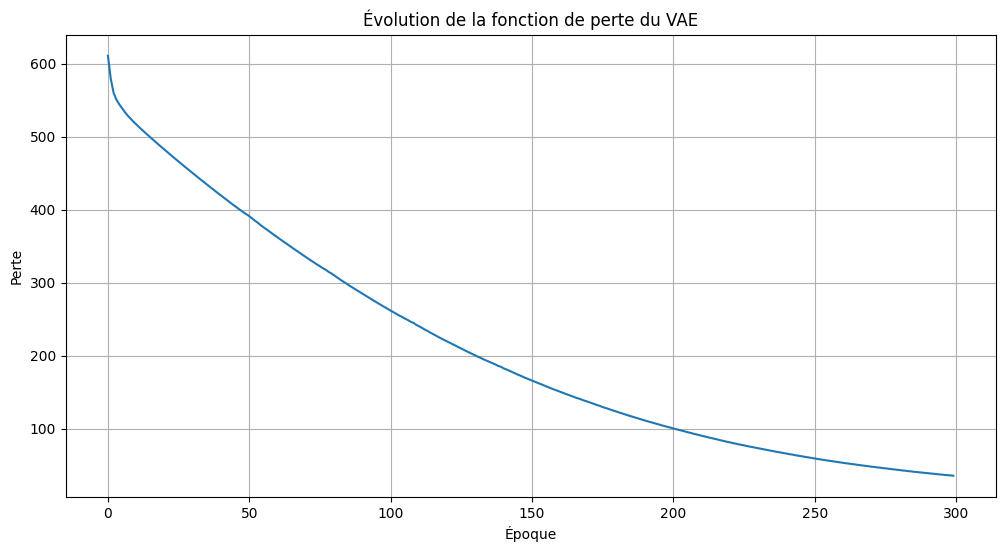

In [10]:
# Création du DataLoader pour les données d'entraînement
chargeur_donnees = DataLoader(
    TensorDataset(torch.from_numpy(X_entrainement).float()),
    batch_size=128,
    shuffle=False
)

# Initialisation du modèle VAE
modele = VAE([44, 400, 400, 400, 10], 10)  # 44 entrées -> encodage vers 10 dimensions latentes

# Configuration du périphérique (GPU si disponible)
utiliser_cuda = True
appareil = torch.device("cuda" if (torch.cuda.is_available() and utiliser_cuda) else "cpu")

# Paramètres d'entraînement
nombre_epochs = 300
taux_apprentissage = 0.00003
modele = modele.to(appareil)
optimiseur = torch.optim.Adam(modele.parameters(), lr=taux_apprentissage)

# Historique des pertes
historique = np.zeros(nombre_epochs)

# Boucle d'entraînement
for ep in range(nombre_epochs):
    pertes_epoch = []
    
    for (entree,) in chargeur_donnees:
        entree = entree.to(appareil)
        reconstruction, z, mu, logVar = modele(entree)

        # Calcul de la divergence KL
        divergence_kl = 0.5 * torch.sum(-1 - logVar + mu.pow(2) + logVar.exp())

        # Fonction de perte = BCE + KL
        perte = F.binary_cross_entropy(reconstruction, entree) + divergence_kl

        # Rétropropagation
        perte.backward()
        optimiseur.step()
        optimiseur.zero_grad()

        pertes_epoch.append(perte.item())

    historique[ep] = sum(pertes_epoch)
    print(f"[{ep + 1}/{nombre_epochs}] Perte totale : {historique[ep]:.4f}")

# Tracer la courbe de la perte au cours des époques
plt.figure(figsize=(12, 6))
plt.plot(historique)
plt.title("Évolution de la fonction de perte du VAE")
plt.xlabel("Époque")
plt.ylabel("Perte")
plt.grid()
plt.show()

In [11]:
# Passage du modèle en mode évaluation (désactive Dropout, BatchNorm, etc.)
modele.eval()

# Application du VAE pour obtenir les représentations latentes (train et test)
_, VAE_X_entrainement, mu_train, var_train = modele(torch.from_numpy(X_entrainement).float().to(appareil))
_, VAE_X_test, mu_test, var_test = modele(torch.from_numpy(X_test).float().to(appareil))

# Fonction pour créer des fenêtres glissantes sur les données temporelles
def fenetre_glissante(X, y, fenetre):
    X_resultat = []
    y_resultat = []
    y_gan = []

    # Construction des séquences (X[t-f:t], y[t]) pour chaque pas de temps
    for i in range(fenetre, X.shape[0]):
        tmp_X = X[i - fenetre:i, :]         # Séquence X sur "fenetre" pas
        tmp_y = y[i]                        # Valeur cible associée
        tmp_y_gan = y[i - fenetre:i + 1]    # Séquence pour GAN : cible étendue

        X_resultat.append(tmp_X)
        y_resultat.append(tmp_y)
        y_gan.append(tmp_y_gan)

    # Conversion en tenseurs PyTorch
    X_resultat = torch.from_numpy(np.array(X_resultat)).float()
    y_resultat = torch.from_numpy(np.array(y_resultat)).float()
    y_gan = torch.from_numpy(np.array(y_gan)).float()

    return X_resultat, y_resultat, y_gan

# Fusion des représentations originales et latentes (concaténation horizontale)
X_entrainement_concat = np.concatenate((X_entrainement, VAE_X_entrainement.cpu().detach().numpy()), axis=1)
X_test_concat = np.concatenate((X_test, VAE_X_test.cpu().detach().numpy()), axis=1)

# Application de la fenêtre glissante avec taille 3
X_entrainement_slide, y_entrainement_slide, y_gan_entrainement = fenetre_glissante(X_entrainement_concat, y_entrainement, 3)
X_test_slide, y_test_slide, y_gan_test = fenetre_glissante(X_test_concat, y_test, 3)

In [12]:
class GenerateurWGAN(nn.Module):
    def __init__(self, taille_entree):
        super().__init__()
        # Trois couches GRU successives pour traiter des séquences temporelles
        self.gru_1 = nn.GRU(taille_entree, 1024, batch_first=True)
        self.gru_2 = nn.GRU(1024, 512, batch_first=True)
        self.gru_3 = nn.GRU(512, 256, batch_first=True)

        # Couches linéaires pour projeter vers la sortie finale
        self.linear_1 = nn.Linear(256, 128)
        self.linear_2 = nn.Linear(128, 64)
        self.linear_3 = nn.Linear(64, 1)

        # Dropout pour régulariser et éviter l’overfitting
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # Initialisation des états cachés pour chaque couche GRU
        appareil = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        h0 = torch.zeros(1, x.size(0), 1024).to(appareil)
        out_1, _ = self.gru_1(x, h0)
        out_1 = self.dropout(out_1)

        h1 = torch.zeros(1, x.size(0), 512).to(appareil)
        out_2, _ = self.gru_2(out_1, h1)
        out_2 = self.dropout(out_2)

        h2 = torch.zeros(1, x.size(0), 256).to(appareil)
        out_3, _ = self.gru_3(out_2, h2)
        out_3 = self.dropout(out_3)

        # Passage de la dernière sortie temporelle à travers les couches denses
        out_4 = self.linear_1(out_3[:, -1, :])  # Dernier pas de temps
        out_5 = self.linear_2(out_4)
        out_6 = self.linear_3(out_5)

        return out_6
    
class DiscriminateurWGAN(nn.Module):
    def __init__(self):
        super().__init__()
        # Trois couches convolutives 1D pour extraire des caractéristiques temporelles
        self.conv1 = nn.Conv1d(4, 32, kernel_size=5, stride=1, padding='same')
        self.conv2 = nn.Conv1d(32, 64, kernel_size=5, stride=1, padding='same')
        self.conv3 = nn.Conv1d(64, 128, kernel_size=5, stride=1, padding='same')

        # Couches entièrement connectées pour la décision binaire (réel/faux)
        self.linear1 = nn.Linear(128, 220)
        self.linear2 = nn.Linear(220, 220)
        self.linear3 = nn.Linear(220, 1)

        # Fonctions d’activation
        self.leaky = nn.LeakyReLU(0.01)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Convolution + LeakyReLU
        conv1 = self.conv1(x)
        conv1 = self.leaky(conv1)

        conv2 = self.conv2(conv1)
        conv2 = self.leaky(conv2)

        conv3 = self.conv3(conv2)
        conv3 = self.leaky(conv3)

        # Aplatissement (on garde uniquement la profondeur)
        x_applati = conv3.reshape(conv3.shape[0], conv3.shape[1])

        # Passage dans les couches linéaires
        out_1 = self.linear1(x_applati)
        out_1 = self.leaky(out_1)

        out_2 = self.linear2(out_1)
        out_2 = self.relu(out_2)

        sortie = self.linear3(out_2)
        return sortie


In [13]:
# Choix de l'appareil (GPU ou CPU)
utiliser_cuda = 1
appareil = torch.device("cuda" if (torch.cuda.is_available() & utiliser_cuda) else "cpu")

# Paramètres d'entraînement
taille_lot = 128
taux_apprentissage = 0.000105
nb_epochs = 100
nb_iterations_critique = 10


# Chargement des données d'entraînement
chargeur_donnees = DataLoader(TensorDataset(X_entrainement_slide, y_gan_entrainement), batch_size=taille_lot, shuffle=False)

# Initialisation des modèles
modele_G = GenerateurWGAN(54).to(appareil)
modele_D = DiscriminateurWGAN().to(appareil)

# Optimiseurs pour les deux réseaux
optimiseur_G = torch.optim.Adam(modele_G.parameters(), lr=taux_apprentissage, betas=(0.0, 0.9), weight_decay=1e-3)
optimiseur_D = torch.optim.Adam(modele_D.parameters(), lr=taux_apprentissage, betas=(0.0, 0.9), weight_decay=1e-3)

# Historique des pertes
historique_G = np.zeros(nb_epochs)
historique_D = np.zeros(nb_epochs)

# Boucle sur les époques
for epoch in range(nb_epochs):
    pertes_G = []
    pertes_D = []

    # Boucle sur les mini-batchs
    for (x, y) in chargeur_donnees:
        x = x.to(appareil)
        y = y.to(appareil)

        # Génération de données synthétiques
        donnees_fausses = modele_G(x)  # Sortie : dernière valeur prédite
        # Ajout aux 3 premières valeurs réelles pour faire une séquence complète
        donnees_fausses = torch.cat([y[:, :3, :], donnees_fausses.reshape(-1, 1, 1)], axis=1)

        # Calcul des sorties du discriminateur
        critique_reel = modele_D(y)
        critique_faux = modele_D(donnees_fausses)

        # Fonction de perte pour le Discriminateur (Wasserstein)
        perte_D = -(torch.mean(critique_reel) - torch.mean(critique_faux))

        # Mise à jour du Discriminateur
        modele_D.zero_grad()
        perte_D.backward(retain_graph=True)
        optimiseur_D.step()

        # Calcul des sorties du Discriminateur sur les données fausses
        critique_faux = modele_D(donnees_fausses)
        perte_G = -torch.mean(critique_faux)

        # Mise à jour du Générateur
        modele_G.zero_grad()
        perte_G.backward()
        optimiseur_G.step()

        # Stockage des pertes
        pertes_D.append(perte_D.item())
        pertes_G.append(perte_G.item())

    # Enregistrement des pertes de l'époque
    historique_D[epoch] = sum(pertes_D)
    historique_G[epoch] = sum(pertes_G)

    # Affichage de la progression
    print(f"[{epoch+1}/{nb_epochs}] Perte D: {sum(pertes_D):.4f} | Perte G: {sum(pertes_G):.4f}")

[1/100] Perte D: -0.0110 | Perte G: -0.3332
[2/100] Perte D: -0.0276 | Perte G: -0.1593
[3/100] Perte D: -0.0434 | Perte G: 0.0051
[4/100] Perte D: -0.0262 | Perte G: 0.1224
[5/100] Perte D: 0.0478 | Perte G: 0.0547
[6/100] Perte D: 0.0347 | Perte G: -0.1042
[7/100] Perte D: 0.0092 | Perte G: -0.1763
[8/100] Perte D: 0.0015 | Perte G: -0.1864
[9/100] Perte D: -0.0009 | Perte G: -0.1595
[10/100] Perte D: -0.0023 | Perte G: -0.1230
[11/100] Perte D: -0.0033 | Perte G: -0.0844
[12/100] Perte D: -0.0042 | Perte G: -0.0489
[13/100] Perte D: -0.0039 | Perte G: -0.0092
[14/100] Perte D: -0.0033 | Perte G: 0.0207
[15/100] Perte D: -0.0026 | Perte G: 0.0486
[16/100] Perte D: -0.0027 | Perte G: 0.0721
[17/100] Perte D: -0.0025 | Perte G: 0.0939
[18/100] Perte D: -0.0029 | Perte G: 0.1116
[19/100] Perte D: -0.0034 | Perte G: 0.1302
[20/100] Perte D: -0.0036 | Perte G: 0.1472
[21/100] Perte D: -0.0039 | Perte G: 0.1547
[22/100] Perte D: -0.0042 | Perte G: 0.1575
[23/100] Perte D: -0.0049 | Perte G

RMSE ensemble d'entraînement : 1.20
RMSE ensemble de test : 1.83


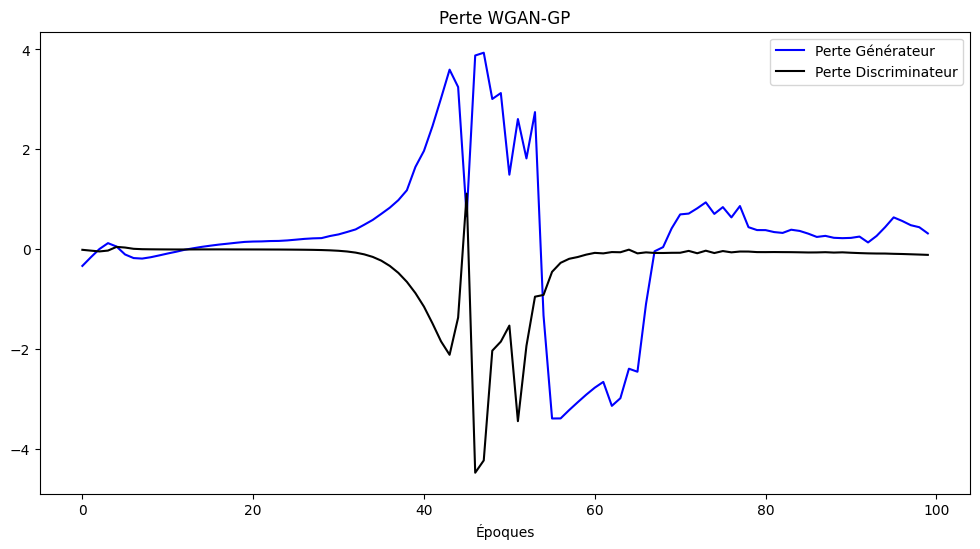

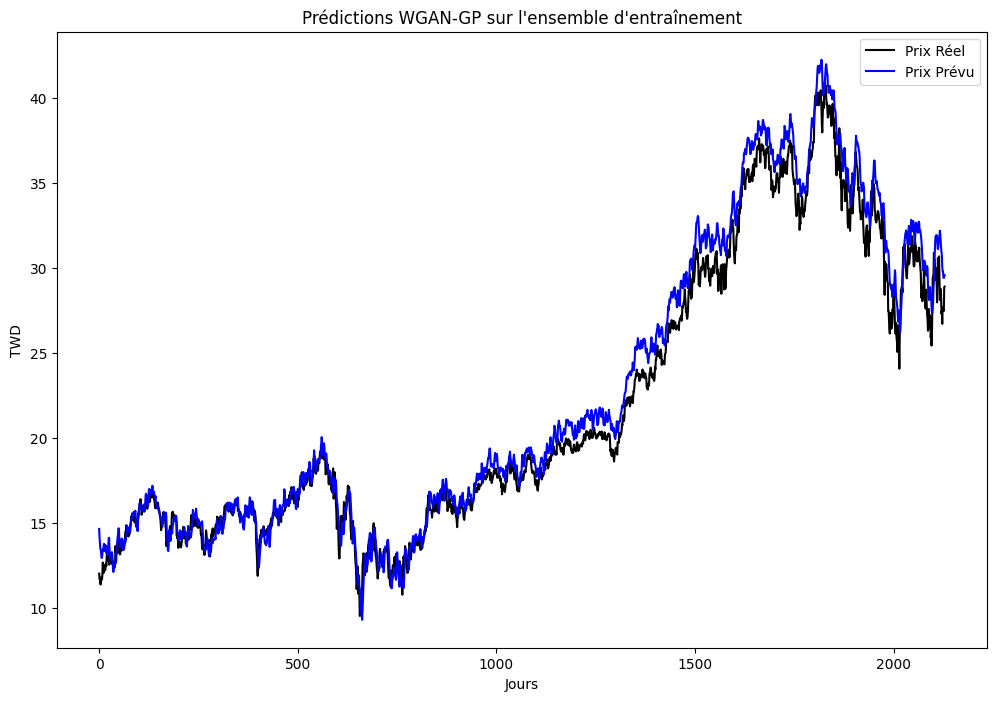

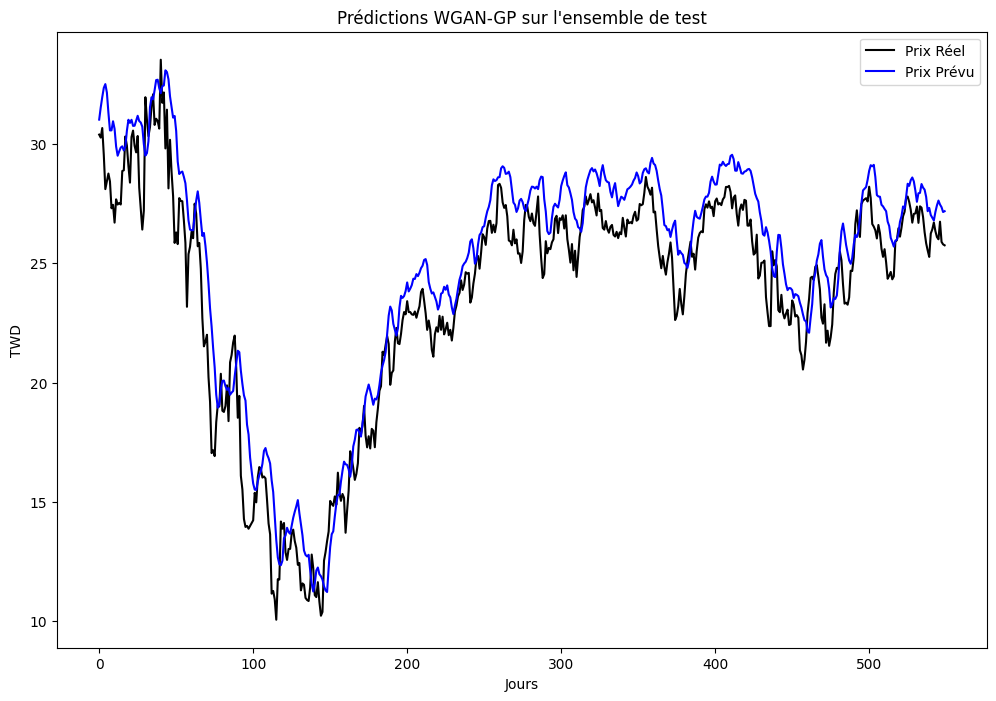

In [14]:
# Affichage des courbes de pertes (loss) du WGAN
plt.figure(figsize=(12, 6))
plt.plot(historique_G, color='blue', label='Perte Générateur')
plt.plot(historique_D, color='black', label='Perte Discriminateur')
plt.title('Perte WGAN-GP')
plt.xlabel('Époques')
plt.legend(loc='upper right')

# Évaluation du générateur (prédictions)
modele_G.eval()

# Prédiction sur les ensembles d'entraînement et de test
pred_y_train = modele_G(X_entrainement_slide.to(appareil))
pred_y_test = modele_G(X_test_slide.to(appareil))


# Inverse de la normalisation des données (MinMaxScaler)
# Valeurs réelles et prédites en valeurs originales (avant normalisation)
y_entrainement_vrai = normaliseur_y.inverse_transform(y_entrainement_slide)
y_entrainement_predit = normaliseur_y.inverse_transform(pred_y_train.cpu().detach().numpy())

y_test_vrai = normaliseur_y.inverse_transform(y_test_slide)
y_test_prevu = normaliseur_y.inverse_transform(pred_y_test.cpu().detach().numpy())


# Affichage des prédictions sur l’ensemble d'entraînement
plt.figure(figsize=(12, 8))
plt.plot(y_entrainement_vrai, color='black', label='Prix Réel')
plt.plot(y_entrainement_predit, color='blue', label='Prix Prévu')
plt.title('Prédictions WGAN-GP sur l\'ensemble d\'entraînement')
plt.ylabel('TWD')
plt.xlabel('Jours')
plt.legend(loc='upper right')

# Calcul de l’erreur quadratique moyenne
mse_train = mean_squared_error(y_entrainement_vrai, y_entrainement_predit)
rmse_train = math.sqrt(mse_train)
print(f"RMSE ensemble d'entraînement : {rmse_train:.2f}")


# Affichage des prédictions sur l’ensemble de test
plt.figure(figsize=(12, 8))
plt.plot(y_test_vrai, color='black', label='Prix Réel')
plt.plot(y_test_prevu, color='blue', label='Prix Prévu')
plt.title('Prédictions WGAN-GP sur l\'ensemble de test')
plt.ylabel('TWD')
plt.xlabel('Jours')
plt.legend(loc='upper right')

# Calcul de l’erreur quadratique moyenne
mse_test = mean_squared_error(y_test_vrai, y_test_prevu)
rmse_test = math.sqrt(mse_test)
print(f"RMSE ensemble de test : {rmse_test:.2f}")

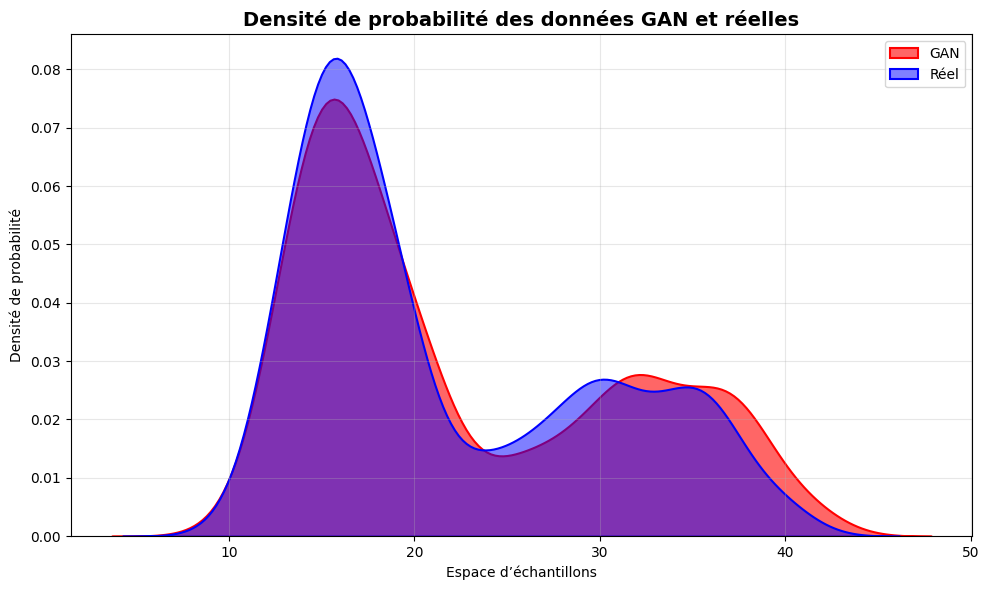

In [15]:
import seaborn as sns


# Aplatir les données (au cas où elles sont en 2D)
reel = y_entrainement_vrai.flatten()
gan = y_entrainement_predit.flatten()

plt.figure(figsize=(10, 6))

# Densité GAN
sns.kdeplot(gan, color="red", fill=True, label="GAN", alpha=0.6, linewidth=1.5)

# Densité réelle
sns.kdeplot(reel, color="blue", fill=True, label="Réel", alpha=0.5, linewidth=1.5)

# Titre et axes
plt.title("Densité de probabilité des données GAN et réelles", fontsize=14, weight='bold')
plt.xlabel("Espace d’échantillons")
plt.ylabel("Densité de probabilité")
plt.legend(loc="upper right")

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [16]:
from scipy.stats import kurtosis, skew, shapiro, jarque_bera, normaltest
import numpy as np
# Exemple : remplacer ceci par tes vraies données
reel = y_entrainement_vrai.flatten()            # Série temporelle réelle (par exemple prix de clôture réel
gan = y_entrainement_predit.flatten()       # Série temporelle synthétique générée par GAN
# Transformer en DataFrame
reel = pd.Series(reel.flatten()) if isinstance(reel, np.ndarray) else reel
gan = pd.Series(gan.flatten()) if isinstance(gan, np.ndarray) else gan

# Conversion en DataFrame
df_comparaison = pd.DataFrame({
    "Prix réel": reel,
    "Prix synthétique": gan
})

# Ajouter l'écart relatif (%) entre les deux
df_comparaison["Écart relatif (%)"] = (
    (df_comparaison["Prix synthétique"] - df_comparaison["Prix réel"]) / df_comparaison["Prix réel"]
) * 100



def statistiques_financieres(serie):
    stats = {}
    stats["Moyenne"] = serie.mean()
    stats["Médiane"] = serie.median()
    stats["Écart-type"] = serie.std()
    stats["Variance"] = serie.var()
    stats["Minimum"] = serie.min()
    stats["Maximum"] = serie.max()
    stats["Skewness"] = skew(serie)
    stats["Kurtosis"] = kurtosis(serie)
    stats["Coef Variation (%)"] = (serie.std() / serie.mean()) * 100 if serie.mean() != 0 else np.nan

    # Rendements log
    rendements_log = np.log(serie / serie.shift(1)).dropna()
    stats["Moy. Rend. Log"] = rendements_log.mean()
    stats["Volatilité Rend. Log"] = rendements_log.std()
    stats["Sharpe Ratio"] = (
        rendements_log.mean() / rendements_log.std() * np.sqrt(252)
        if rendements_log.std() != 0 else np.nan
    )
        # Tests de normalité
    if len(serie) < 5000:
        _, p_shapiro = shapiro(serie)
        stats["Shapiro (p-val)"] = p_shapiro
    else:
        stats["Shapiro (p-val)"] = np.nan

    _, p_jb = jarque_bera(serie)
    stats["Jarque-Bera (p-val)"] = p_jb

    _, p_agostino = normaltest(serie)
    stats["D’Agostino (p-val)"] = p_agostino
    
    return stats

# Appliquer aux deux séries
stats_reelles = statistiques_financieres(reel)
stats_synthetiques = statistiques_financieres(gan)

# Résumé 
df_stats = pd.DataFrame({
    "Données réelles": stats_reelles,
    "Données synthétiques": stats_synthetiques
})

# Affichage arrondi
print("🔍 Statistiques descriptives comparées :")
print(df_stats.round(4))

🔍 Statistiques descriptives comparées :
                      Données réelles  Données synthétiques
Moyenne                       21.7991               22.5751
Médiane                       18.1676               18.8313
Écart-type                     8.1301                8.6800
Variance                      66.0978               75.3420
Minimum                        9.5292                9.3058
Maximum                       40.8947               42.2422
Skewness                       0.6945                0.6301
Kurtosis                      -0.9224               -1.0467
Coef Variation (%)            37.2954               38.4493
Moy. Rend. Log                 0.0004                0.0003
Volatilité Rend. Log           0.0196                0.0155
Sharpe Ratio                   0.3336                0.3385
Shapiro (p-val)                0.0000                0.0000
Jarque-Bera (p-val)            0.0000                0.0000
D’Agostino (p-val)             0.0000                0.0000


In [17]:
from scipy.stats import levene, bartlett

# Extraire les rendements log
rendement_reel = np.log(df_comparaison["Prix réel"].values[1:] / df_comparaison["Prix réel"].values[:-1])
rendement_synthetique = np.log(df_comparaison["Prix synthétique"].values[1:] / df_comparaison["Prix synthétique"].values[:-1])

# Test de Levene
stat_levene, p_levene = levene(rendement_reel, rendement_synthetique)
print(f"🔎 Test de Levene : statistique = {stat_levene:.4f}, p-valeur = {p_levene:.4f}")

# Test de Bartlett (si les données sont normales)
stat_bartlett, p_bartlett = bartlett(rendement_reel, rendement_synthetique)
print(f"📏 Test de Bartlett : statistique = {stat_bartlett:.4f}, p-valeur = {p_bartlett:.4f}")

🔎 Test de Levene : statistique = 39.3173, p-valeur = 0.0000
📏 Test de Bartlett : statistique = 117.8278, p-valeur = 0.0000
